<a href="https://colab.research.google.com/github/NgoThanhNha/Artificial_Intelligence/blob/main/CNN_Fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
folder = '/content/drive/MyDrive/Homework_CNN_Picture/Finger_12Cung/'
photos, labels = list(), list()

In [ ]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('Fingerprint_Cung1'):
    output = 1.0
  if file.startswith('Fingerprint_Cung2'):
    output = 2.0
  if file.startswith('Fingerprint_Cung3'):
    output = 3.0
  if file.startswith('Fingerprint_Cung4'):
    output = 4.0
  if file.startswith('Fingerprint_Cung5'):
    output = 5.0
  if file.startswith('Fingerprint_Cung6'):
    output = 6.0
  if file.startswith('Fingerprint_Cung7'):
    output = 7.0
  if file.startswith('Fingerprint_Cung8'):
    output = 8.0
  if file.startswith('Fingerprint_Cung9'):
    output = 9.0
  if file.startswith('Fingerprint_Cung10'):
    output = 10.0
  if file.startswith('Fingerprint_Cung11'):
    output = 11.0
  if file.startswith('Fingerprint ('):
    output = 12.0
  photo = load_img(folder+file, target_size = (50,50))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(1037, 50, 50, 3) (1037,)


In [ ]:
# Save data after preprocessing data
save('/content/drive/MyDrive/Picture_Preprocessing/Fingerprint/Fingerprint_photos.npy', photos)
save('/content/drive/MyDrive/Picture_Preprocessing/Fingerprint/Fingerprint_labels.npy', labels)

In [ ]:
# Read data
photos = np.load('/content/drive/MyDrive/Picture_Preprocessing/Fingerprint/Fingerprint_photos.npy')
labels = np.load('/content/drive/MyDrive/Picture_Preprocessing/Fingerprint/Fingerprint_labels.npy')

In [ ]:
# Chuẩn hóa dữ liệu
x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=13)
print(x_train.shape, y_train.shape)

(1037, 50, 50, 3) (1037, 13)


In [ ]:
# Import library training model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [ ]:
# Config model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(13, activation='softmax'))

In [ ]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 80, epochs = 10, verbose = 1)

Epoch 1/10
13/13 [==============================] - 1s 28ms/step - loss: 1.8142 - accuracy: 0.4060
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 1.5890 - accuracy: 0.4928
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 1.4203 - accuracy: 0.5391
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 1.2477 - accuracy: 0.6056
Epoch 5/10
13/13 [==============================] - 0s 15ms/step - loss: 1.1266 - accuracy: 0.6422
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 0.9163 - accuracy: 0.7435
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: 0.8066 - accuracy: 0.7608
Epoch 8/10
13/13 [==============================] - 0s 9ms/step - loss: 0.6667 - accuracy: 0.8120
Epoch 9/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5295 - accuracy: 0.8602
Epoch 10/10
13/13 [==============================] - 0s 16ms/step - loss: 0.3803 - accuracy: 0.9180


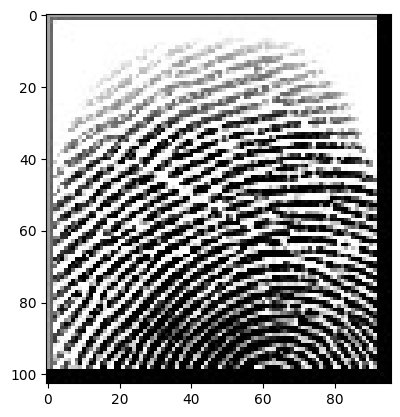

1/1 [==============================] - 0s 30ms/step
Cung của bạn:  Song Ngư
Dự đoán cho tương lai của bạn:  Tương lai của bạn sẽ phụ thuộc vào khả năng đối mặt với những cảm xúc và tình huống khó khăn trong cuộc sống. Nếu bạn có thể học cách kiểm soát và chấp nhận chúng, bạn sẽ đạt được những thành công lớn trong tương lai


In [ ]:
# Mở ảnh
img = Image.open('Fingerprint (2).jpg')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((50, 50))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,50,50,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", 
               "Bạch Dương", 
               "Kim Ngưu",
               "Song Tử",
               "Cự Giải", 
               "Sư Tử", 
               "Xử Nữ", 
               "Thiên Bình", 
               "Bọ Cạp", 
               "Nhân Mã", 
               "Ma kết",
               "Bảo Bình",
               "Song Ngư"]
class_names_Description = ["Không biết", 
               "Bạn sẽ có nhiều cơ hội để thăng tiến trong công việc và cuộc sống cá nhân trong tương lai. Tuy nhiên, bạn cũng cần phải tránh quá chủ quan và học cách lắng nghe ý kiến của người khác", 
               "Bạn sẽ có những thay đổi đáng kể trong cuộc sống trong tương lai gần. Bạn sẽ phải đối mặt với những thách thức mới, nhưng nếu bạn giữ vững niềm tin vào bản thân và làm việc chăm chỉ, bạn sẽ đạt được thành công",
               "Tương lai của bạn sẽ phụ thuộc vào khả năng thích nghi với những thay đổi trong cuộc sống. Bạn cần phải học cách đối phó với áp lực và không để nó ảnh hưởng đến sự tự tin và quyết định của mình",
               "Bạn sẽ có nhiều thay đổi trong cuộc sống trong tương lai gần. Điều này có thể đem lại sự lo lắng và căng thẳng, nhưng đồng thời cũng là cơ hội để bạn trưởng thành và phát triển", 
               "Bạn sẽ có nhiều cơ hội để thể hiện bản thân trong công việc và cuộc sống cá nhân. Tuy nhiên, bạn cũng cần phải học cách kiểm soát cảm xúc và không để chúng chi phối hành động của mình", 
               "Tương lai của bạn sẽ phụ thuộc vào khả năng tổ chức và kỷ luật của bạn. Nếu bạn có thể tổ chức công việc và cuộc sống cá nhân của mình tốt hơn, bạn sẽ đạt được nhiều thành công", 
               "Bạn sẽ phải đối mặt với nhiều sự lựa chọn và quyết định trong tương lai. Tuy nhiên, nếu bạn học cách đưa ra quyết định đúng đắn và công bằng, bạn sẽ đạt được những kết quả tốt đẹp", 
               "Tương lai của bạn sẽ phụ thuộc vào khả năng đối mặt với những thách thức và thay đổi trong cuộc sống. Nếu bạn có thể tự tin và kiên trì trong quá trình vượt qua chúng, bạn sẽ đạt được nhiều thành công", 
               "Bạn sẽ có nhiều cơ hội để khám phá và trải nghiệm trong cuộc sống. Tuy nhiên, bạn cũng cần phải học cách đối mặt với những trở ngại và không quá tự mãn với những thành công của mình", 
               "Tương lai của bạn sẽ phụ thuộc vào khả năng lập kế hoạch và kỷ luật của bạn. Nếu bạn có thể đặt mục tiêu rõ ràng và hành động chăm chỉ, bạn sẽ đạt được những kết quả tốt đẹp",
               " Bạn sẽ có nhiều cơ hội để đóng góp ý tưởng mới và sáng tạo trong cuộc sống. Tuy nhiên, bạn cũng cần phải học cách hợp tác với người khác và tránh làm việc đơn độc",
               "Tương lai của bạn sẽ phụ thuộc vào khả năng đối mặt với những cảm xúc và tình huống khó khăn trong cuộc sống. Nếu bạn có thể học cách kiểm soát và chấp nhận chúng, bạn sẽ đạt được những thành công lớn trong tương lai"]

temp1 = matrix[0]
print("Cung của bạn: ", class_names[temp1])
print("Dự đoán cho tương lai của bạn: ", class_names_Description[temp1])